In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Importing The Data

In [35]:
# Load the dataset
path = "E:\\CalTech ML_AI\\Machine Learning\\ML_Projects\\Employee Turnover Analytics\\1736848217_hr_comma_sep\\"

df = pd.read_csv(path+'HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 1.	Perform data quality checks by checking for missing values, if any.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [37]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

##### Observations:
- No null values . 
- Two categorical columns and the rest are numerical.

### 2.	Understand what factors contributed most to employee turnover at EDA.

#### 2.1.	Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

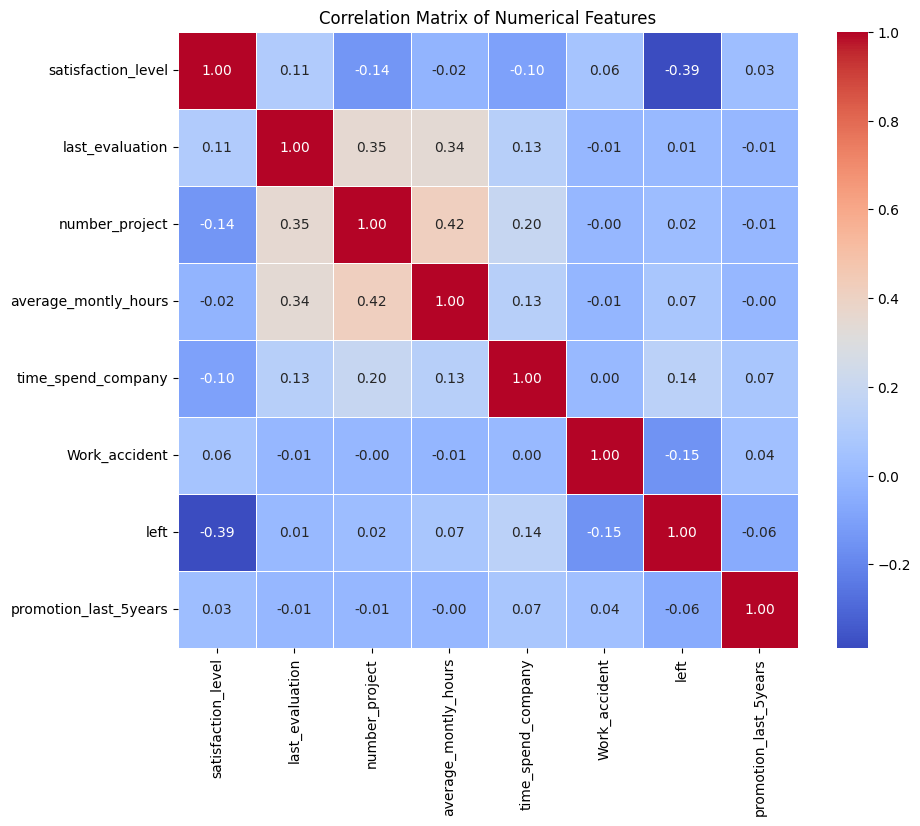

In [38]:
# Calculate the correlation matrix excluding 'sales' and 'salary'
correlation_matrix = df.drop(columns=['sales', 'salary']).corr()

# Plot the heatmap for all numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### 2.2.	Draw the distribution plot of:
■	Employee Satisfaction (use column satisfaction_level)

■	Employee Evaluation (use column last_evaluation)

■	Employee Average Monthly Hours (use column average_montly_hours)


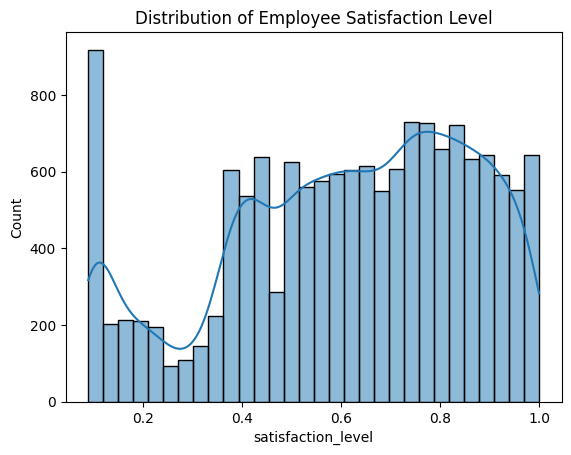

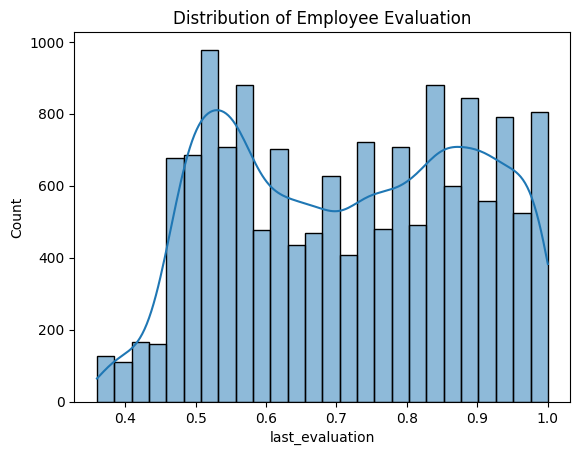

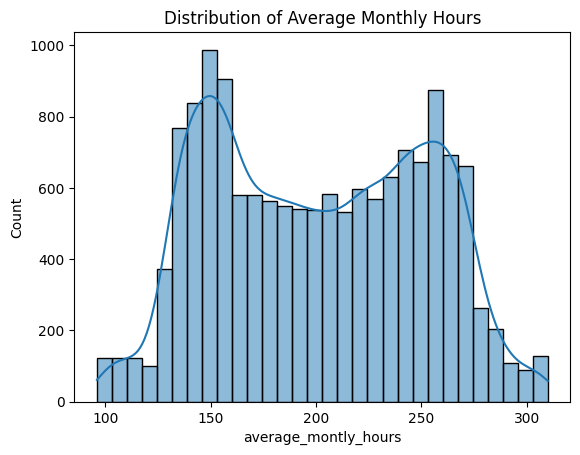

In [39]:
# Distribution plot for satisfaction_level
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Distribution of Employee Satisfaction Level')
plt.show()

# Distribution plot for last_evaluation
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Distribution of Employee Evaluation')
plt.show()

# Distribution plot for average_montly_hours
sns.histplot(df['average_montly_hours'], kde=True)
plt.title('Distribution of Average Monthly Hours')
plt.show()

#### 2.3.	Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

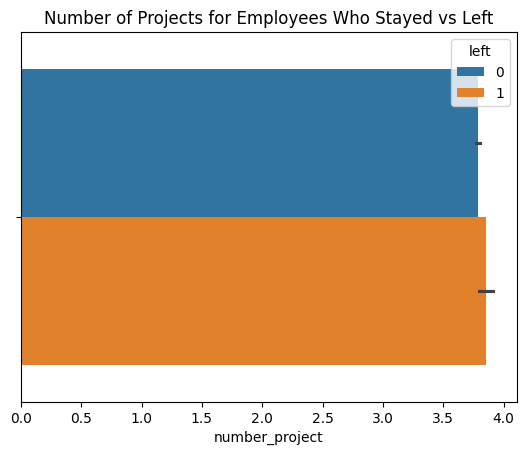

In [40]:
sns.barplot(x='number_project', hue='left', data=df)
plt.title('Number of Projects for Employees Who Stayed vs Left')
plt.show()

#### Inferences from the plot
    - People who left the company are also the ones who were involved in the most projects.

### 3.	Perform clustering of employees who left based on their satisfaction and evaluation.

####    -3.1.	Choose columns satisfaction_level, last_evaluation, and left.
####    -3.2.	Do K-means clustering of employees who left the company into 3 clusters.
####    -3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.


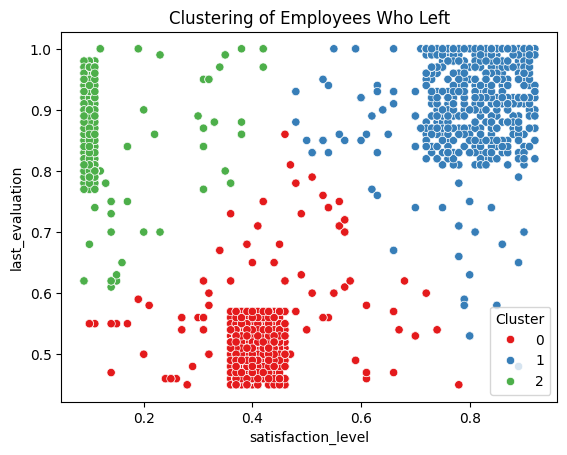

In [41]:
# Filter the data for employees who left
filtered_data = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=20)
filtered_data['Cluster'] = kmeans.fit_predict(filtered_data)

# Plot the clusters
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='Cluster', data=filtered_data, palette='Set1')
plt.title('Clustering of Employees Who Left')
plt.show()

### Thoughts based on evaluation factors:

    -Strong evaluation scores, Low satisfaction levels.
        -This group might have included burned-out high performers. They may have excelled at their jobs but felt undervalued, overworked, or lacked work-life balance, ultimately leading them to leave.

    -Low evaluation scores, low satisfaction levels.
        -These employees likely struggled to meet expectations and were also unhappy with their roles or work environment.  

    -High satisfaction levels, strong evaluation scores.
        -This group’s exit may seem surprising. Possible reasons could include better external opportunities, career stagnation, or lack of growth prospects.

### 4.	Handle the left Class Imbalance using the SMOTE technique.

#### 4.1.	Pre-process the data by converting categorical columns to numerical columns by:

■	Separating categorical variables and numeric variables

■	Applying get_dummies() to the categorical variables

■	Combining categorical variables and numeric variables


In [42]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
#change categorical features to numerical values.
df = pd.get_dummies(df, columns=['sales', 'salary'], dtype=int) 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
df_encoded = pd.get_dummies(df.copy(), drop_first=True)

#### 4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [45]:
# Split data into features and target variable
X = df.drop('left', axis=1)
y = df['left']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

#### 4.3.	Upsample the train dataset using the SMOTE technique from the imblearn module.

In [46]:
# Apply SMOTE
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### 4.4.	Perform 5-fold cross-validation model training and evaluate performance.
#### 4.5.	Train a logistic regression model, apply a 5-fold CV, and plot the classification report.


In [47]:
# Align feature columns to ensure consistency
X_test_aligned = X_test[X_train_smote.columns]

# Standardize the data
scaler = StandardScaler()
#X_train_smote_scaled = scaler.fit_transform(X_train_smote)
#X_test_scaled = scaler.transform(X_test_aligned)  # Use the aligned test set
# Ensure X_train_smote is a DataFrame (with columns)
X_train_smote_scaled = pd.DataFrame(scaler.fit_transform(X_train_smote), columns=X_train_smote.columns)

# Ensure X_test_aligned is a DataFrame (with columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_aligned), columns=X_test_aligned.columns)

# Logistic Regression with improved settings
log_reg = LogisticRegression(random_state=123, max_iter=500)

# Cross-validation
cv_scores_log_reg = cross_val_score(log_reg, X_train_smote_scaled, y_train_smote, cv=5, scoring='accuracy')

# Train and evaluate
log_reg.fit(X_train_smote_scaled, y_train_smote)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      2286
           1       0.53      0.71      0.61       714

    accuracy                           0.78      3000
   macro avg       0.71      0.76      0.73      3000
weighted avg       0.81      0.78      0.79      3000



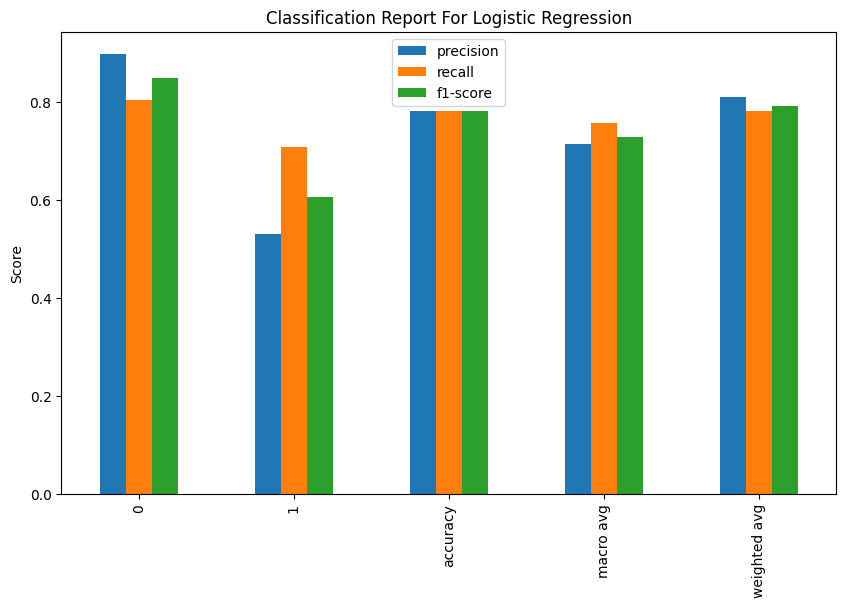

In [48]:
# Generate the classification report
report = classification_report(y_test, y_pred_log_reg, output_dict=True)

# Convert to DataFrame (optional)
df = pd.DataFrame(report).T

# Exclude 'support' column for the plot
df = df.drop(columns=['support'])

# Plot the data
df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report For Logistic Regression')
plt.ylabel('Score')
plt.show()

#### 4.6.	Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

In [49]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=123)
cv_scores_rf = cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Train and evaluate
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

# Classification report
print("Random Forest Classifier Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



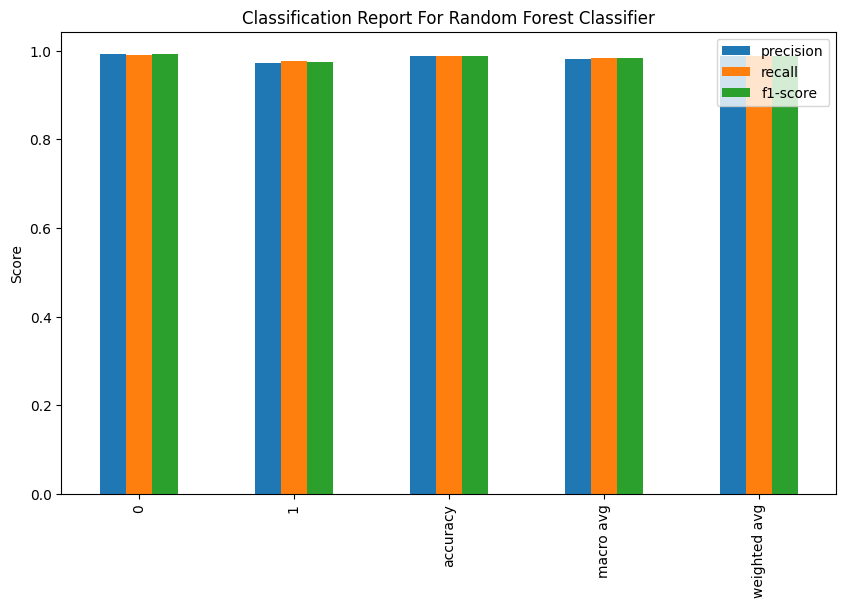

In [50]:
# Generate the classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert to DataFrame (optional)
df = pd.DataFrame(report).T

# Exclude 'support' column for the plot
df = df.drop(columns=['support'])

# Plot the data
df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report For Random Forest Classifier')
plt.ylabel('Score')
plt.show()


In [51]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=123)
cv_scores_gb = cross_val_score(gb, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Train and evaluate
gb.fit(X_train_smote, y_train_smote)
y_pred_gb = gb.predict(X_test)

# Classification report
print("Gradient Boosting Classifier Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



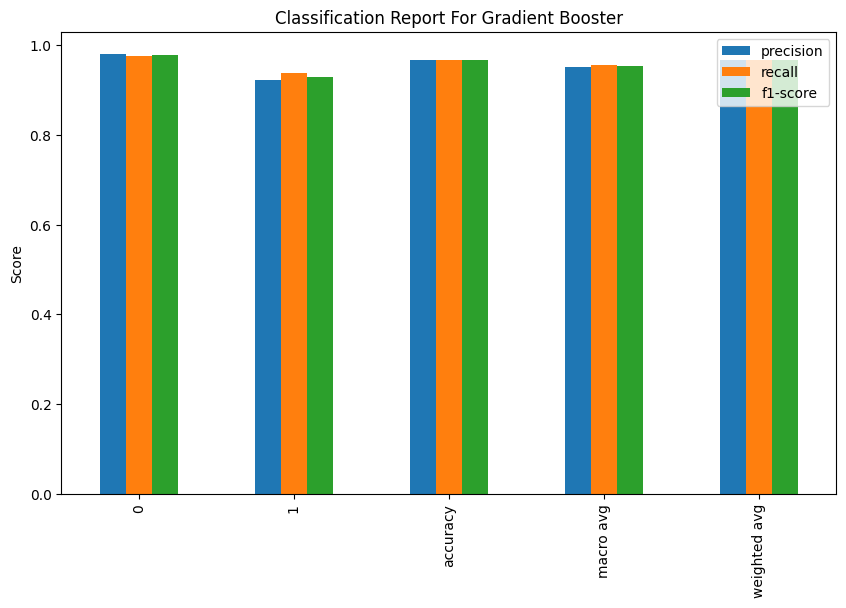

In [52]:
# Generate the classification report
report = classification_report(y_test, y_pred_gb, output_dict=True)

# Convert to DataFrame (optional)
df = pd.DataFrame(report).T

# Exclude 'support' column for the plot
df = df.drop(columns=['support'])

# Plot the data
df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report For Gradient Booster')
plt.ylabel('Score')
plt.show()


### 5.	Identify the best model and justify the evaluation metrics used.

#### 5.1.	Find the ROC/AUC for each model and plot the ROC curve

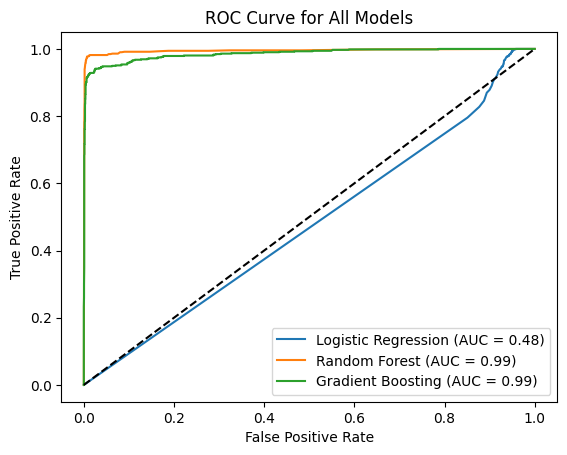

In [53]:
# Evaluate ROC/AUC for each model
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'Gradient Boosting': gb}
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

#### 5.2.	Find the confusion matrix for each of the models.

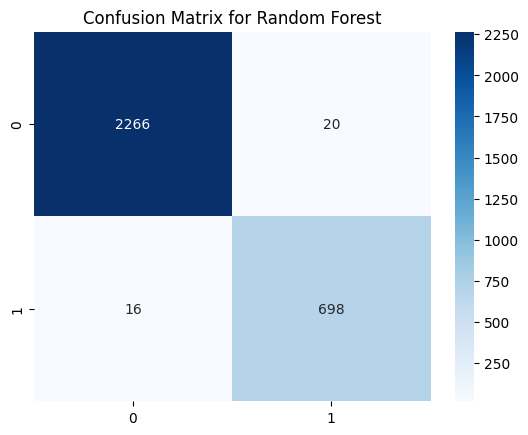

In [54]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

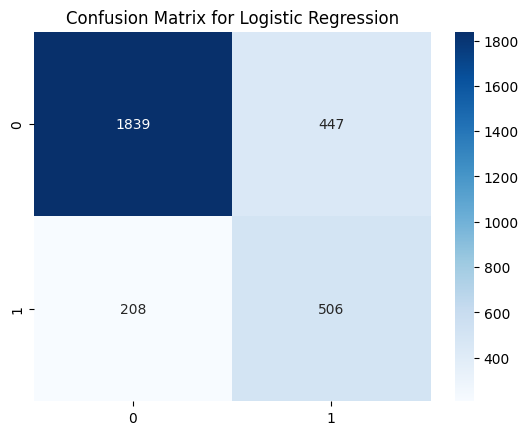

In [55]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

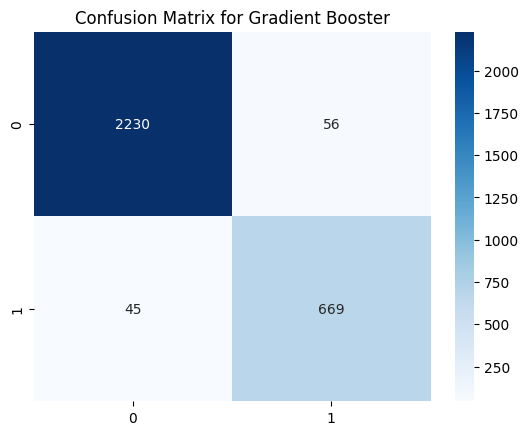

In [56]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Booster')
plt.show()

In [57]:
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")


Recall: 0.98
Precision: 0.97
F1 Score: 0.97


#### For employee turnover prediction, Recall is more important. Missing employees who are likely to leave may result in costly talent losses.

### 6.	Suggest various retention strategies for targeted employees.

#### 6.1.	Using the best model, predict the probability of employee turnover in the test data.

In [58]:
# Predict probabilities using the best model (e.g., Random Forest)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

In [59]:
# Categorize employees into zones based on predicted probabilities
def categorize_employee_turnover(prob):
    if prob < 0.20:
        return 'Safe Zone'
    elif 0.20 <= prob < 0.60:
        return 'Low-Risk Zone'
    elif 0.60 <= prob < 0.90:
        return 'Medium-Risk Zone'
    else:
        return 'High-Risk Zone'

zones = [categorize_employee_turnover(prob) for prob in y_pred_prob_rf]

In [60]:
# Ensure the test dataset has the correct shape
if len(y_pred_prob_rf) != len(X_test):
    raise ValueError("Mismatch between prediction probabilities and test dataset size.")

# Create a new column in X_test (or make a copy of df before modifying)
X_test = X_test.copy()  # Ensure we don't modify the original test set

# Categorize employees into retention zones
X_test['Retention Zone'] = [categorize_employee_turnover(prob) for prob in y_pred_prob_rf]


In [61]:
print(X_test.head())  # Check the first few rows
print(X_test['Retention Zone'].value_counts())  # Count occurrences of each category


       satisfaction_level  last_evaluation  number_project  \
10627                0.98             0.77               3   
2703                 0.76             0.93               3   
6059                 0.70             0.93               3   
3258                 0.48             0.61               3   
4565                 0.57             0.90               3   

       average_montly_hours  time_spend_company  Work_accident  \
10627                   191                   2              0   
2703                    271                   5              0   
6059                    185                   4              0   
3258                    223                   3              1   
4565                    144                   2              0   

       promotion_last_5years  sales_IT  sales_RandD  sales_accounting  ...  \
10627                      0         0            0                 0  ...   
2703                       0         0            0                 0  ...

In [62]:
print(len(y_pred_prob_rf), len(X_test))  # Should be the same

3000 3000


#### 6.2.	Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
■	Safe Zone (Green) (Score < 20%)

■	Low-Risk Zone (Yellow) (20% < Score < 60%)

■	Medium-Risk Zone (Orange) (60% < Score < 90%)

■	High-Risk Zone (Red) (Score > 90%).


In [63]:
X_test[['Retention Zone']].head(10)  # Display first 10 rows with the new column


,Retention Zone
10627,Safe Zone
2703,Medium-Risk Zone
6059,Safe Zone
3258,Safe Zone
4565,Safe Zone
4991,Safe Zone
13976,Safe Zone
9427,Safe Zone
7173,Safe Zone
13412,Safe Zone


In [64]:
random_rows = X_test[['Retention Zone']].sample(n=10, random_state=42)
print(random_rows)


       Retention Zone
1859   High-Risk Zone
6976        Safe Zone
14157       Safe Zone
7073        Safe Zone
6586    Low-Risk Zone
868    High-Risk Zone
3782        Safe Zone
2592        Safe Zone
2408        Safe Zone
5832        Safe Zone
